In [1]:
%pip install pandas numpy seaborn matplotlib scikit-learn

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [7]:
df = pd.read_csv("advertising.csv")
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [12]:
df.shape

(200, 4)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.3 KB


In [9]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [10]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

<AxesSubplot:>

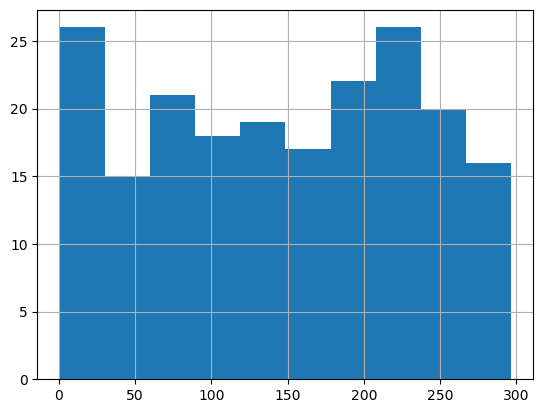

In [16]:
df["TV"].hist()

<AxesSubplot:>

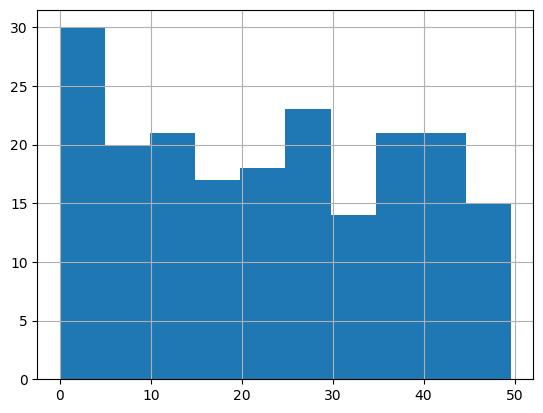

In [17]:
df["Radio"].hist()

<AxesSubplot:>

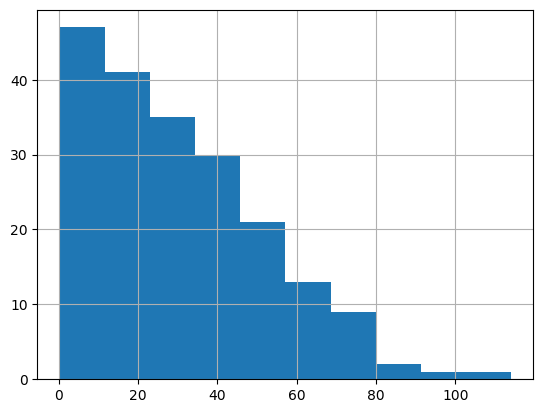

In [18]:
df["Newspaper"].hist()

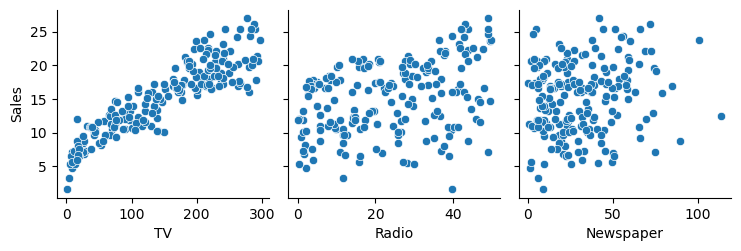

In [22]:
sns.pairplot(df,x_vars=['TV','Radio','Newspaper'],y_vars='Sales',kind='scatter')

<AxesSubplot:>

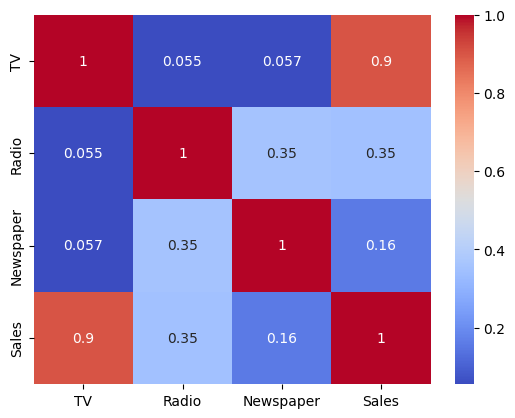

In [26]:
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

In [27]:
X = df.drop(columns = "Sales")
Y = df["Sales"]

In [28]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2) 

In [32]:
model = LinearRegression()

In [33]:
model.fit(X_train, Y_train)

LinearRegression()

In [34]:
X_train_pred = model.predict(X_train)
X_train_pred

array([22.76688486, 17.355845  , 21.84600341, 14.9043402 , 21.4211498 ,
       19.04339061, 17.82669793,  8.63309959, 10.34299504, 10.18788798,
       13.76570978, 17.37245117, 18.86581708, 18.07589513,  9.28835592,
       15.61720283,  8.77997948,  5.19438608,  7.69273875, 24.95986434,
       21.11698767, 20.22168846, 11.91217026, 23.6098494 , 21.34638726,
       10.83353992, 20.81370719,  7.0851864 ,  5.32616384, 10.95816394,
       13.4573139 ,  9.40982282, 18.56500035, 11.76869768, 11.11245621,
        7.27223836,  5.94786874,  9.67731873, 15.98472636, 21.77371257,
       23.11010791, 23.79543162, 15.86890842, 14.73870421, 19.40784082,
       21.29072756, 19.56530566, 12.98448   , 25.01152362, 15.44113132,
       19.56686091,  9.04971105, 14.29235532, 20.21274455, 14.13700703,
       23.72963105, 17.09092701, 24.28494438, 19.22259634, 17.21730867,
       13.72518251,  8.96183217, 19.25785378,  9.80525768, 22.31587633,
       12.17741687, 18.22377314, 20.73518572, 12.28585382, 17.87

In [45]:
mse_train = mean_squared_error(Y_train, X_train_pred)
print("Training Evaluation:", mse_train)

Training Evaluation: 2.6226033961726185


In [43]:
X_test_pred = model.predict(X_test)
X_test_pred

array([15.81794247, 10.15032354,  8.26737799, 18.25580684, 18.06466407,
       17.24354571,  8.81294515, 22.04513076, 12.38208193, 21.03691149,
        9.58287515, 20.13791992, 10.69692702,  9.05217041, 17.19403767,
       10.33653542,  8.63490536, 17.27389797, 18.24930692, 19.29279069,
       18.94026036, 19.46168254, 11.11298733, 10.6675807 , 18.0316489 ,
       14.58414874, 16.58323824,  9.27911751, 18.82160438, 17.18558892,
       20.11211809, 16.22950562, 15.87936272, 14.05507975,  7.89699942,
       12.12455603, 21.74608041, 21.4076981 , 19.58225049, 19.50042709])

In [46]:
mse_train = mean_squared_error(Y_test, X_test_pred)
print(f"Training Set Evaluation:\nMSE: {mse_train}")

Training Set Evaluation:
MSE: 3.091721330322731
